In [1]:
import numpy as np
import pandas as pd

import ipywidgets as widgets
from IPython.display import display, Math

import dtmc
import mcviz

Loading BokehJS ...

# DTMC: Section 3 - Markov Chain Dynamics

In this section, we will explore how to calculate $m$-step transition probabilities and state the Chapman-Kolmogorov Equations.  This defines the dynamics of a Markov chain.

You should be comfortable with the concepts from Section 2:
* state space $\mathcal{S}$
* transition probability matrix $\mathbf{P}$
* $m$-step transition probability $\mathsf{P}\left(X_{n+m} = j \,|\, X_n = i\right)$
* Markov property

You should also be familiar with the definition of conditional probability:

$$ \mathsf{P}(A \,|\, B) = \frac{\mathsf{P}(A \cap B)}{\mathsf{P}(B)} $$

and idea of “conditioning” on a partition $\{E_i\}$ of the sample space $\Omega$:

$$ \mathsf{P}(A) = \sum_i \mathsf{P}(A \,|\, E_i) \mathsf{P}(E_i) $$

Consider our original rat in the maze example:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

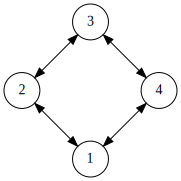

In [6]:
P = np.array([[0, 0.5, 0, 0.5],
              [0.5, 0, 0.5, 0],
              [0, 0.5, 0, 0.5],
              [0.5, 0, 0.5, 0]])

S = [1, 2, 3, 4]

dtmc.disp_dtmc(P, S, frac=True)
display(mcviz.dot_mc(P, S, bidir=True))

## Two-Step Transition Probabilities

How would you calculate the *two*-step transition probability from state 1 to state 3?

$$ \mathsf{P}\left(X_2 = 3 \,|\, X_0 = 1\right) $$

(In words, what is the probability that the rat starts in room 1 and ends up in room 3 after *two* moves?)

**Look at all the possible paths.** There are two possible paths: 
* $X_0 = 1 \to X_1 = 2 \to X_2 = 3$
  $$\mathsf{P}(X_2 = 3, X_1 = 2 \,|\, X_0 = 1) = \mathsf{P}(X_2 = 3 \,|\, X_0 = 1, X_1 = 2) \mathsf{P}(X_1 = 2 \,|\, X_0 = 1) = 1/4$$
  
* $X_0 = 1 \to X_1 = 4 \to X_2 = 3$
  $$\mathsf{P}(X_2 = 3, X_1 = 2 \,|\, X_0 = 1) = \mathsf{P}(X_2 = 3 \,|\, X_0 = 1, X_1 = 2) \mathsf{P}(X_1 = 2 \,|\, X_0 = 1) = 1/4$$

So the two-step transition probability is the sum of the probabilities of these two possible paths, or $1/2$.  (Of course, these paths are mutually exclusive -- the rat can be in *either* room 2 or room 4 at time 1.)

$$ \mathsf{P}\left(X_2 = 3 \,|\, X_0 = 1\right) = 1/2 $$

More generally, to find the two-step transition probability from state $i$ to state $j$ for any $i, j \in \mathcal{S}$, we consider all paths through the intermediate state $k$:

$$\begin{aligned}
     \mathsf{P}(X_2 = j \,|\, X_0 = i) &= \sum_{k \in \mathcal{S}} \mathsf{P}(X_2 = j,\ X_1 = k \,|\, X_0 = i) &&\text{(Law of total probability)} \\
     &= \sum_{k \in \mathcal{S}} \mathsf{P}(X_1 = k \,|\, X_0 = i) \mathsf{P}(X_2 = j \,|\, X_0 = i, X_1 = k) && \text{(Definition of conditional probability)} \\
     &= \sum_{k \in \mathcal{S}} \mathsf{P}(X_1 = k \,|\, X_0 = i) \mathsf{P}(X_2 = j \,|\, X_1 = k) && \text{(Markov property)} \\
     &= \sum_{k \in \mathcal{S}} p_{ik} p_{kj} \\     
  \end{aligned}$$


## Exercise 2.1

Fill out the table of **two-step** transition probabilities

| **two-step** trans. prob. | to state 1  | to state 2   | to state 3   | to state 4   |
|:--- |:---:|:---:|:---:|:---:|
| from state 1 |  1/2 | 0 |  1/2  | 0 | 
| from state 2 | 
| from state 3 | 
| from state 4 | 


## Chapman-Kolmogorov Equations

Let's introduce some more succinct notation for the two-step transition probabilities:

$$ p_{ij}^{(2)} \overset{\mathsf{def}}{=} \mathsf{P}\left(X_2 = j \,|\, X_0 = i\right) $$

and write the two-step transition probabilities as a matrix $\mathbf{P}^{(2)}$ where the $i$th row and $j$th column of the matrix is the two-step transition probability from state $i$ to state $j$:

$$\mathbf{P}^{(2)} = \begin{pmatrix} 
    p_{1 1}^{(2)} & p_{1 2}^{(2)} & p_{1 3}^{(2)} & p_{1 4}^{(2)} \\
    p_{2 1}^{(2)} & p_{2 2}^{(2)} & p_{2 3}^{(2)} & p_{2 4}^{(2)} \\
    p_{3 1}^{(2)} & p_{3 2}^{(2)} & p_{3 3}^{(2)} & p_{3 4}^{(2)} \\
    p_{4 1}^{(2)} & p_{4 2}^{(2)} & p_{4 3}^{(2)} & p_{4 4}^{(2)} \\
  \end{pmatrix} $$

(This is entirely analogous to our notation for the one-step transition probabilities.)

The formula we derived for the two-step transition probabilities

$$ p_{ij}^{(2)} = \sum_{k \in \mathcal{S}} p_{ik} p_{kj} \qquad \text{for any } i, j \in \mathcal{S}$$

can be written neatly with matrix multiplication

$$ \mathbf{P}^{(2)} = \mathbf{P} \cdot \mathbf{P} $$

More generally, for any $m \geq 1$, we will abbreviate the $m$-step transition probability from state $i$ to state $j$ as

$$ p_{ij}^{(m)} \overset{\mathsf{def}}{=} \mathsf{P}\left(X_m = j \,|\, X_0 = i\right) $$

and let $\mathbf{P}^{(m)}$ be the $m$-step transition probability *matrix*.  Then, for any $n, m \geq 1$

$$ p_{ij}^{(n+m)} = \sum_{k \in \mathcal{S}} p_{ik}^{(n)} p_{kj}^{(m)} $$

or in matrix notation

$$\mathbf{P}^{(n+m)} = \mathbf{P}^{(n)} \mathbf{P}^{(m)}$$

These are known as the **Chapman-Kolmogorov equations** which describe the dynamics of a Markov chain.  (The ones presented here are for a discrete-time Markov chain.  We will see an equivalent for continuous-time Markov chains later in the course.)

One practical implication of the Chapman-Kolmogorov equations is that we can easily calculate any $m$-step transition probability matrix from the one-step transition probability matrix $\mathbf{P}$ by multiplying $\mathbf{P}$ by itself $m$ times:

$$ \mathbf{P}^{(m)} = \underbrace{\mathbf{P} \cdot \mathbf{P} \cdots \mathbf{P}}_{m \text{ times}} $$

This tells us that the one-step transition probability matrix $\mathbf{P}$ and state space $\mathcal{S}$ **completely specify the dynamics of the discrete-time Markov chain**.

In [3]:
def example(P, S, m):
    dtmc.disp_dtmc(P, S, frac=True)
    display(mcviz.dot_mc(P, S, bidir=True))

    index = pd.Index(np.arange(1,m))
    path = pd.Series(list(map(lambda n: np.linalg.matrix_power(P, n), index)), index)
    widgets.interact(lambda y: display(path[y]), y=widgets.IntSlider(value=0, min=min(index), max=max(index), description='step'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

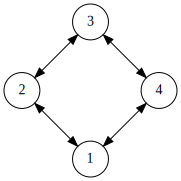

interactive(children=(IntSlider(value=1, description='step', max=39, min=1), Output()), _dom_classes=('widget-…

In [4]:
S = [1, 2, 3, 4]
P = np.array([[0, 0.5, 0, 0.5],
              [0.5, 0, 0.5, 0],
              [0, 0.5, 0, 0.5],
              [0.5, 0, 0.5, 0]])
m = 40
example(P, S, m)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

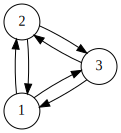

interactive(children=(IntSlider(value=1, description='step', max=39, min=1), Output()), _dom_classes=('widget-…

In [5]:
S = [1, 2, 3]
P = np.array([[0.25, 0.25, 0.5], [0.5, 0, 0.5], [0.5, 0.5, 0]])
display(Math(r'\mathcal{S} = \{' + ','.join(map(str,S)) + '\}'))
display(Math(r'\mathbf{P} = ' + dtmc.pmatrix(P, frac=True)))
display(mcviz.dot_mc(P, S, bidir=False))

m = 40
index = pd.Index(np.arange(1,m))
path = pd.Series(list(map(lambda n: np.linalg.matrix_power(P, n), index)), index)
widgets.interact(lambda y: display(path[y]), y=widgets.IntSlider(value=0, min=min(index), max=max(index), description='step'));

### Exercise 2.2

For each of the examples above, what do you notice about $\mathbf{P}^{(m)}$ as you increase $m$?

How can you intuitively explain the pattern for the first example (our original four-room maze) and why it does not appear in the second example (the three-room maze)?

What happens to $\mathbf{P}^{(m)}$ for large $m$ in the second example?

Looking ahead, this is a preview of *periodic* versus *aperiodic* Markov chains and *convergence to the stationary distribution*.

## Working in Python (Optional)

As you may have picked up in the above examples, you can specify the state space $\mathcal{S}$ and (one-step) transition probability matrix $\mathbf{P}$ as variables and use Python to draw the transition diagram and calculate the $m$-step transition probability matrix $\mathbf{P}^{(m)}$.

$\mathcal{S}$ is specified as a [list](https://docs.python.org/3/tutorial/datastructures.html) and $\mathbf{P}$ is specified as a [Numpy array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) (constructed from a Python list of lists).

To display a TeX-rendered state space $\mathcal{S}$
```python
display(Math(r'\mathcal{S} = \{' + ','.join(map(str,S)) + '\}'))
```

To display a TeX-rendered transition probability matrix $\mathbf{P}$
```python
display(Math(r'\mathbf{P} = ' + dtmc.pmatrix(P, frac=True)))
```
(Note: the `frac=True` keyword argument attempts to represent the transition probabilities as fractions with a maximum denominator of 100.  Omit the argument or set it to `False` for decimal representation.)

To display the transition diagram
```python
display(mcviz.dot_mc(P, S, bidir=True))
```
(Note: the `bidir=True` keyword argument uses two-headed arrows if transitions are possible in both directions rather than two separate one-headed arrows.  This de-clutters the diagram a little bit, but it may make it harder to distinguish between unidirectional and bidirectional transitions.)

Finally, to calculate $\mathbf{P}^{(m)}$, use Numpy's linear algebra package's `matrix_power` function ([documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.matrix_power.html)).
```python
np.linalg.matrix_power(P, m)
```